In [11]:
import csv
import re
import glob

# 获取所有城市的CSV文件路径
csv_files = glob.glob('链家网*二手房.csv')

# csv_files = glob.glob('链家网zengcheng二手房.csv')

# 创建合并后的CSV文件，并写入表头
merged_file_path = '链家网所有城市二手房.csv'
with open(merged_file_path, mode='w', encoding='utf-8', newline='') as merged_file:
    csv_writer = csv.writer(merged_file)
    csv_writer.writerow(['Title', 'Community', 'Rooms', 'Area', 'Orientation', 'Decoration', 'Floor', 'Year', 'Tags', 'Total Price', 'Unit Price'])

    # 合并数据到一个CSV文件
for csv_file in csv_files:
    with open(csv_file, mode='r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # 跳过表头
        for row in csv_reader:
            title = row[0]
            address = row[1]
            room = ''
            area = ''
            direction = ''
            decoration = ''
            floor = ''
            year = ''
            tags = row[3]
            total_price = row[4]
            unit_price = row[5]
#             break
#             print(f"Original title: {row}",title)

            room_match = re.search(r'(\d+)室(\d+)厅', title)
            if room_match:
                room = f"{room_match.group(1)}室{room_match.group(2)}厅"
                title = re.sub(r'\d+室\d+厅', '', title)
#                 print(f"Extracted room: {room}")
            else:
                room_match = re.search(r'(\d+)室(\d+)厅', row[2])
            if room_match:
                room = f"{room_match.group(1)}室{room_match.group(2)}厅"
                title = re.sub(r'\d+室\d+厅', '', title)
#                 print(f"Extracted room: {room}")
            else:
                room = f"0室0厅"
#                 print(f"Original title: {row}",title)
#                 break
#             break
            # 提取其他字段的信息
            other_info = re.split(r'\s*\|\s*', row[2])
#             if len(other_info) >= 6:
            try :
                area_match = re.search(r'(\d+)', other_info[1])
                if area_match:
                    area = area_match.group(1)
                else :
                    print(other_info)
#            
            except:
                pass
            direction = other_info[2]
            decoration = other_info[3]
            try :
                floor_match = re.search(r'(\d+)', other_info[4])
                if floor_match:
                    floor = floor_match.group(1)
                else :
                    floor = 0
            except:
                floor = 0
            try :  
                year_match = re.search(r'(\d+)', other_info[5])
                if year_match:
                    year = year_match.group(1)
                else:
                    year = 0
            except:
                year = 0
            
            unit_price = re.sub("\D", "", unit_price)
            # 将其他列转换为向量形式
#             try:
            vectorized_row = [title, address, room, int(area), direction, decoration, int(floor), int(year), tags, float(total_price),float(unit_price)]
#             except ValueError:
#                 vectorized_row = [title, address, room, int(area), direction, decoration, int(floor), 0, tags, float(total_price),float(unit_price)]

            # 写入合并后的CSV文件
            with open(merged_file_path, mode='a', encoding='utf-8', newline='') as merged_file:
                csv_writer = csv.writer(merged_file)
                csv_writer.writerow(vectorized_row)
#     break
print("数据处理完成。")


数据处理完成。


/tmp/ipykernel_42/1706900556.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177164 entries, 0 to 177163
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Title                177164 non-null  object 
 1   Community            177164 non-null  object 
 2   Rooms                177164 non-null  object 
 3   Area                 177164 non-null  int64  
 4   Orientation          177164 non-null  object 
 5   Decoration           177164 non-null  object 
 6   Floor                177164 non-null  float64
 7   Year                 177164 non-null  float64
 8   Tags                 176917 non-null  object 
 9   Total Price          177164 non-null  float64
 10  Unit Price           177164 non-null  float64
 11  chamber              177164 non-null  float64
 12  office               177164 non-null  float64
 13  residential          177164 non-null  object 
 14  quarters             177164 non-null  object 
 15  quarters_ranking 

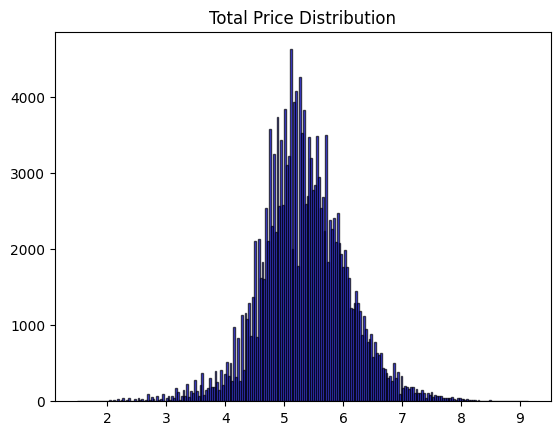

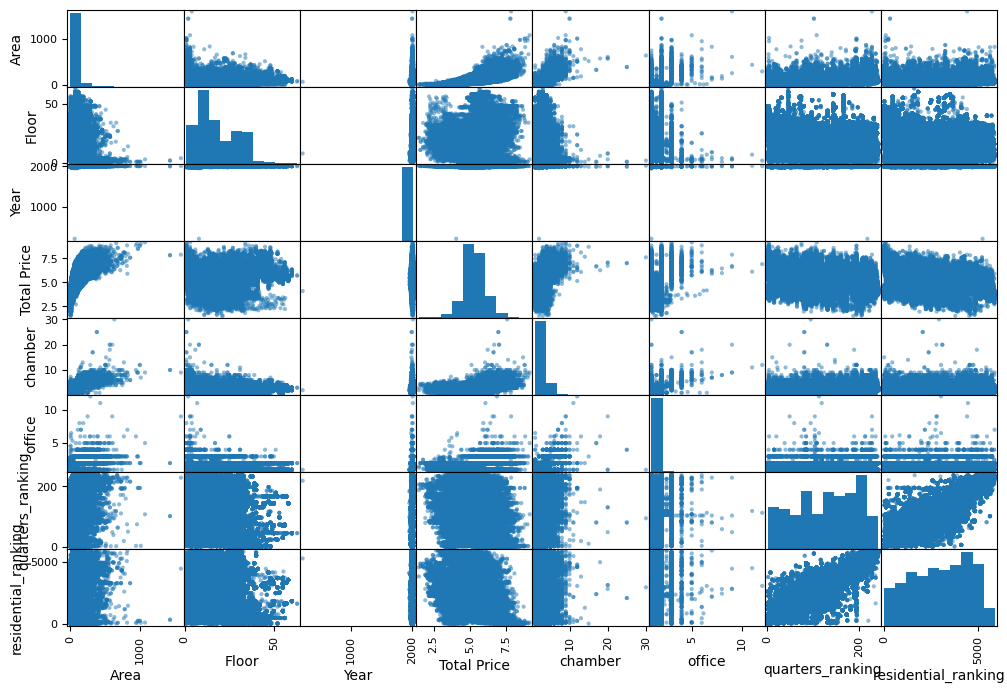

<class 'pandas.core.frame.DataFrame'>
Index: 148526 entries, 0 to 177163
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Area                 148526 non-null  int64  
 1   Floor                148526 non-null  float64
 2   Year                 148526 non-null  float64
 3   Total Price          148526 non-null  float64
 4   chamber              148526 non-null  float64
 5   office               148526 non-null  float64
 6   quarters_ranking     148526 non-null  float64
 7   residential_ranking  148526 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 10.2 MB
None


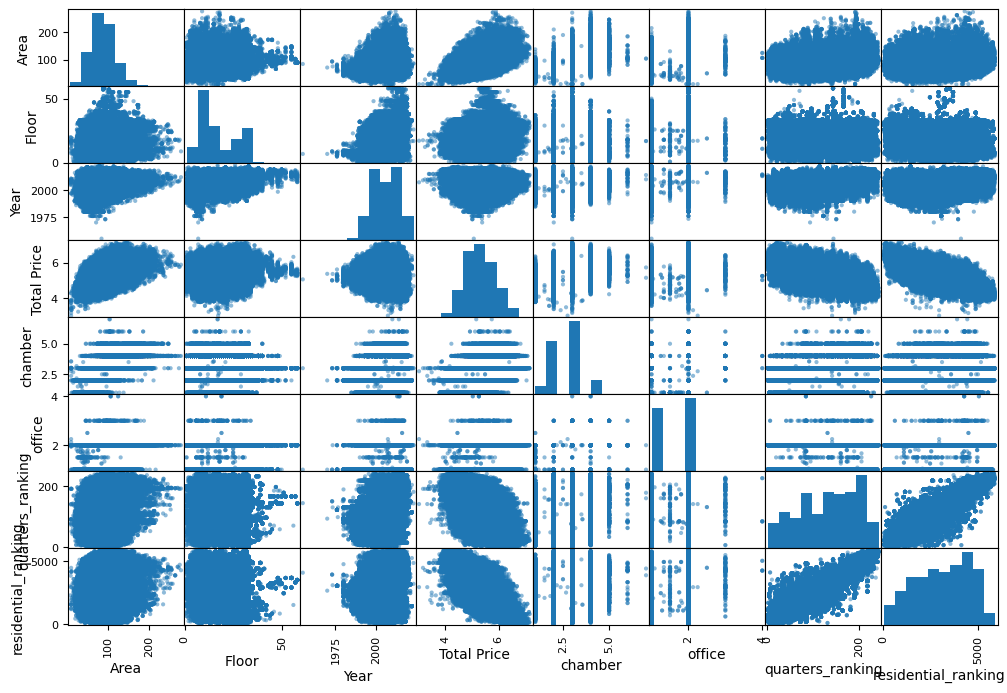

['residential_ranking', 'quarters_ranking', 'Area', 'chamber', 'Floor', 'office']
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               1792      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 1024)              525312    
                                                                 
 dense_13 (Dense)            (None, 2048)              2099200   
                                      

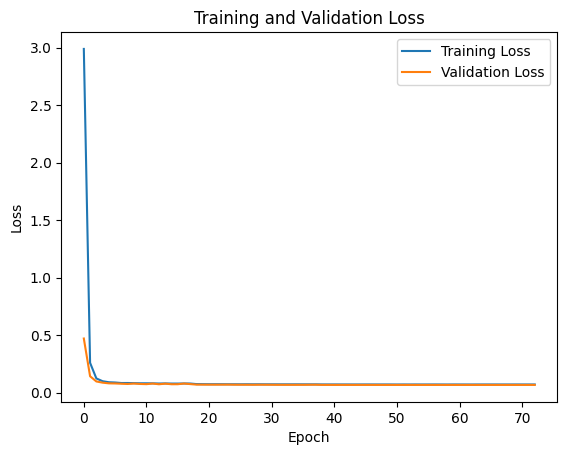

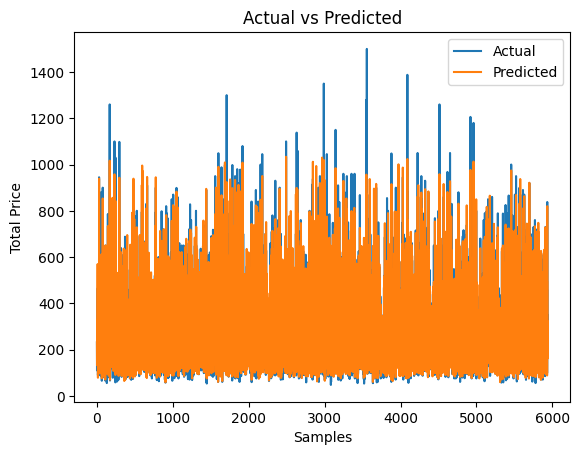

Test MSE: 1840.8275
r2_score: 0.94


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.optimizers import Adam
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.ensemble import IsolationForest
# 读取合并后的CSV文件
df = pd.read_csv('/kaggle/working/链家网所有城市二手房.csv')
# 拆分房间字段为室和厅
df[['chamber', 'office']] = df['Rooms'].str.extract(r'(\d+)室(\d+)厅').astype('int')
df[['residential', 'quarters']] = df['Community'].str.extract(r'(.+)-(.+)')
# 计算quarters的平均房价和排名
quarters_average_prices = df.groupby('quarters')['Unit Price'].mean().reset_index()
quarters_average_prices['quarters_ranking'] = quarters_average_prices['Unit Price'].rank(ascending=False)
df = pd.merge(df, quarters_average_prices[['quarters', 'quarters_ranking']], on='quarters', how='left')
# 计算residential的平均房价和排名
residential_average_prices = df.groupby('residential')['Unit Price'].mean().reset_index()
residential_average_prices['residential_ranking'] = residential_average_prices['Unit Price'].rank(ascending=False)
df = pd.merge(df, residential_average_prices[['residential', 'residential_ranking']], on='residential', how='left')
df['Total Price'], Total_Price_ = boxcox(df['Total Price'])
# df['Area'], Area_Price_ = boxcox(df['Area'])
df.replace(0, np.nan, inplace=True)
df.replace('0', np.nan, inplace=True)
# df = df.dropna()
df = df.interpolate(method='linear')
print(df.info())
# 删除重复值和缺失值
df = df.dropna()
plt.hist(df['Total Price'], bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.title('Total Price Distribution')
plt.show()
df_one = df.drop(labels=['Title','Community','Rooms','Orientation','Tags','residential','quarters','Decoration','Unit Price'], axis=1)
# 画出多变量图，画散点图的好处是可以观察变量之间是否为线性相关
pd.plotting.scatter_matrix(df_one, figsize=(12, 8), alpha=0.5)
plt.show()
# 创建 Isolation Forest 模型
clf = IsolationForest(n_estimators=100,random_state=32)
# 选择特定列
dataframe_one = df_one
# 拟合模型并预测离群值
pred = clf.fit_predict(dataframe_one,)
# 找到正常值的索引
normal_index = np.where(pred == 1)[0]
# 提取正常值
normal_data = dataframe_one.iloc[normal_index]
print(normal_data.info())
# 画出多变量图，画散点图的好处是可以观察变量之间是否为线性相关
pd.plotting.scatter_matrix(normal_data, figsize=(12, 8), alpha=0.5)
plt.show()
corr_matrix_normal_data = normal_data.corr()
# print(corr_matrix_normal_data)
# 皮尔森相关系数法，选择相关性高的特征列
corr_matrix = normal_data.corr()
high_corr_features = corr_matrix['Total Price'][abs(corr_matrix['Total Price']) > 0.5].index.tolist()
# print(corr_matrix)
# 选取k个相关系数值最大的列
k = 6
selected_features = corr_matrix['Total Price'].abs().nlargest(k + 1).index[1:]
features = [col for col in selected_features if col != 'Total Price']
print(features)
# 选择特征和目标变量
target = 'Total Price'
# 拆分数据集为训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(normal_data[features], normal_data[target], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# 初始化StandardScaler对象
scaler_x = StandardScaler()
scaler_y = StandardScaler()
# 对训练集进行拟合和归一化
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
Y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
X_train_scaled = scaler_x.fit_transform(X_train)

# 使用训练集拟合的scaler对验证集进行归一化
X_val_scaled = scaler_x.transform(X_val)

# 使用训练集拟合的scaler对测试集进行归一化
X_test_scaled = scaler_x.transform(X_test)

# 构建Sequential模型
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(units=2048, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# 打印模型结构
print(model.summary())

# 编译模型
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, threshold_mode='rel', patience=5, min_lr=0)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
model.compile(loss='mean_squared_error', optimizer=Adam())

# 训练模型
history = model.fit(X_train_scaled, y_train_scaled, callbacks=[reduce_lr, early_stop], epochs=1000, batch_size=1000, verbose=2, validation_data=(X_val_scaled, Y_val_scaled))

# 在测试集上进行预测，并反归一化
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

# 反归一化测试集目标变量
# y_test_original = scaler.inverse_transform(y_test.values.reshape(len(y_test), 1)).flatten()
# 绘制训练和验证损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


y_test_inv_boxcox = inv_boxcox(y_test, Total_Price_)
y_pred_inv_boxcox = inv_boxcox(y_pred, Total_Price_)

# 绘制效果折线图
plt.plot(range(len(y_test_inv_boxcox)), y_test_inv_boxcox, label='Actual')
plt.plot(range(len(y_pred_inv_boxcox)), y_pred_inv_boxcox, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Total Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# 计算测试集上的均方误差
test_mse = mean_squared_error(y_test_inv_boxcox, y_pred_inv_boxcox)
print(f'Test MSE: {test_mse:.4f}')
print('r2_score: %.2f'% r2_score(y_test_inv_boxcox, y_pred_inv_boxcox))

In [13]:
from keras.models import save_model
# 保存模型
save_model(model, 'Total_Price.h5')

/tmp/ipykernel_42/3858689252.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'Total_Price.h5')


In [14]:
from keras.models import load_model
import numpy as np
import pandas as pd
df = pd.read_csv('/kaggle/working/链家网所有城市二手房.csv')
df[['residential', 'quarters']] = df['Community'].str.extract(r'(.+)-(.+)')
# 计算quarters的平均房价和排名
quarters_average_prices = df.groupby('quarters')['Unit Price'].mean().reset_index()
quarters_average_prices['quarters_ranking'] = quarters_average_prices['Unit Price'].rank(ascending=False)
df = pd.merge(df, quarters_average_prices[['quarters', 'quarters_ranking']], on='quarters', how='left')
# 计算residential的平均房价和排名
residential_average_prices = df.groupby('residential')['Unit Price'].mean().reset_index()
residential_average_prices['residential_ranking'] = residential_average_prices['Unit Price'].rank(ascending=False)
df = pd.merge(df, residential_average_prices[['residential', 'residential_ranking']], on='residential', how='left')

model = load_model('/kaggle/working/Total_Price.h5')
data = []
df_data_one = df.drop_duplicates(['quarters_ranking']).copy()
for i in  df_data_one['quarters_ranking']:
    data.append({
    'residential_ranking': 3535.0,##小区id
    'quarters_ranking': i,##地区id
    'Area': 55,
    'chamber': 3,
    'Floor': 5,
    'office': 1})

# 加载模型
model = load_model('/kaggle/working/Total_Price.h5')

# 创建一个空的DataFrame
df_data = pd.DataFrame(data)

# 提取特征列
features = ['residential_ranking', 'quarters_ranking', 'Area', 'chamber', 'Floor', 'office']

# 从DataFrame中选择特征矩阵
X = df_data[features].values

# 对特征矩阵进行归一化处理
X_scaled = scaler_x.transform(X)

# 使用模型进行预测
y_pred_scaled = model.predict(X_scaled)

# 对预测结果进行反归一化处理
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

# 将预测结果添加到DataFrame中
df_data_one['Predicted Total Price'] = inv_boxcox(y_pred, Total_Price_).astype('int')

# 打印DataFrame
df_data


8/8 [==============================] - 0s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,residential_ranking,quarters_ranking,Area,chamber,Floor,office
0,3535.0,155.0,55,3,5,1
1,3535.0,160.0,55,3,5,1
2,3535.0,29.0,55,3,5,1
3,3535.0,164.0,55,3,5,1
4,3535.0,139.0,55,3,5,1
...,...,...,...,...,...,...
238,3535.0,223.0,55,3,5,1
239,3535.0,142.0,55,3,5,1
240,3535.0,156.0,55,3,5,1
241,3535.0,124.0,55,3,5,1


In [15]:
df_data_one[['quarters','Predicted Total Price']].to_csv('梅园小区二区在全广州建设小区价格低预测.csv')

In [16]:
import numpy as np
import pandas as pd
import os
import zipfile

# 加载模型
model = load_model('/kaggle/working/Total_Price.h5')


df_data_one = df.drop_duplicates(['quarters_ranking']).copy()
data = []
# 循环遍历地区列表
for quarters_id in df_data_one['quarters_ranking']:
    for i in df_data_one['residential_ranking']:
        data.append({
            'residential_ranking': i,  # 小区ID
            'quarters_ranking': quarters_id,  # 地区ID
            'Area': 55,
            'chamber': 3,
            'Floor': 5,
            'office': 1
        })

df_data = pd.DataFrame(data)

# 提取特征列
features = ['residential_ranking', 'quarters_ranking', 'Area', 'chamber', 'Floor', 'office']

# 从DataFrame中选择特征矩阵
X = df_data[features].values

# 对特征矩阵进行归一化处理
X_scaled = scaler_x.transform(X)

# 使用模型进行预测
y_pred_scaled = model.predict(X_scaled)

# 对预测结果进行反归一化处理
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

# 将预测结果添加到DataFrame中
df_data['Predicted Total Price'] = inv_boxcox(y_pred, Total_Price_).astype('int')

df_data['Average Predicted Total Price'] = df_data.groupby('quarters_ranking')['Predicted Total Price'].transform('mean')
# 计算平均预测总价
df_data['Average Predicted Total Price'] = df_data.groupby('quarters_ranking')['Predicted Total Price'].transform('mean')

# 计算竞争力得分
df_data['Competitiveness'] = df_data['Predicted Total Price'] / df_data['Average Predicted Total Price']

# 按照竞争力得分和地区进行排序
df_data_sorted = df_data.sort_values(['quarters_ranking', 'Competitiveness'])

# 按照竞争力得分进行升序排序后，将每个地区的小区按照竞争力从低到高进行排序
df_data_sorted = df_data_sorted.sort_values('Competitiveness', ascending=True)
result_data = []

# 遍历df_data中的每一行
for index, row in df_data.iterrows():
    residential_id = row['residential_ranking']
    quarters_id = row['quarters_ranking']
    
    # 在df_data_one中找到对应的小区字符串和城市字符串
    residential_str = df_data_one.loc[df_data_one['residential_ranking'] == residential_id, 'residential'].values[0]
    quarters_str = df_data_one.loc[df_data_one['quarters_ranking'] == quarters_id, 'quarters'].values[0]
    
    # 将匹配结果添加到新的DataFrame中
    result_data.append({
        'residential_id': residential_id,
        'quarters_id': quarters_id,
        'residential_str': residential_str,
        'quarters_str': quarters_str,
        'Predicted Total Price': row['Predicted Total Price'],
        'Competitiveness': row['Competitiveness']
    })

# 创建包含匹配结果的新DataFrame
result_df = pd.DataFrame(result_data)

# 根据城市ID将数据分组
grouped_data = result_df.groupby('quarters_id')
path = '/kaggle/working/result'
os.makedirs(path)   
# 循环处理每个城市的数据
for city_id, city_data in grouped_data:
    city_name = city_data['quarters_str'].iloc[0]  # 获取城市名称
    city_filename = f'{path}/{city_name}_result.csv'  # 构造保存文件名
    
    # 保存城市数据为CSV文件
    city_data.to_csv(city_filename, index=False)


  37/1846 [..............................] - ETA: 2s  

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1846/1846 [==============================] - 3s 1ms/step


In [17]:
!tar -zcvf result.tar.gz /kaggle/working/result

tar: Removing leading `/' from member names
/kaggle/working/result/
/kaggle/working/result/\345\215\216\345\215\227\347\242\247\346\241\202\345\233\255_result.csv
/kaggle/working/result/\344\272\272\346\260\221\350\267\257_result.csv
/kaggle/working/result/\346\226\260\345\241\230\345\214\227_result.csv
/kaggle/working/result/\347\245\236\345\262\227\351\225\207_result.csv
/kaggle/working/result/\347\217\240\346\261\237\346\226\260\345\237\216\350\245\277_result.csv
/kaggle/working/result/\346\261\237\345\244\217_result.csv
/kaggle/working/result/\351\207\221\347\242\247_result.csv
/kaggle/working/result/\347\207\225\345\241\230_result.csv
/kaggle/working/result/\344\270\234\346\200\241\346\226\260\345\214\272_result.csv
/kaggle/working/result/\347\237\263\346\273\251\351\225\207_result.csv
/kaggle/working/result/\350\214\266\346\273\230_result.csv
/kaggle/working/result/\347\237\263\344\272\225_result.csv
/kaggle/working/result/\345\244\251\346\262\263\345\205\254\345\233\255_result.c